In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
import sklearn.model_selection
from sklearn.metrics import confusion_matrix

In [4]:
# Load data from dataset
df = pd.read_csv("dataset/crime_pred_data.csv")

In [5]:
df = df.dropna(axis = 1)

In [6]:
# Scale data and split into train and test
x = np.array(df["PctUnemployed"])
y = np.array(df["ViolentCrimesPerPop"])
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [7]:
def fit_linear(x,y):
    xm = np.mean(x)
    ym = np.mean(y)
    syy = np.mean((y-ym)**2)
    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)
    w1 = syx/sxx
    w0 = ym - w1*xm
    yp = w0+w1*x
    rss = np.sum((y-yp)**2)
    tss = np.sum((y-ym)**2)
    rsq = 1 - rss/tss
    return w0, w1, rsq

In [8]:
w0, w1, rsq = fit_linear(x,y)
print(fit_linear(x,y))

(0.026226148895462625, 0.5829000376389368, 0.2550674694361844)


R^2 = 0.2550674694361844
w0 = 0.026226148895462625 w1 = 0.5829000376389368


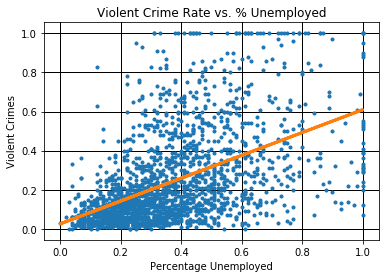

In [9]:
yp = w0 + w1 * x
plt.scatter(x,y,s=5)
plt.plot(x, y, '.')
plt.ylabel('Violent Crimes')
plt.xlabel('Percentage Unemployed')
plt.title('Violent Crime Rate vs. % Unemployed')
plt.grid(color='black', linestyle='-', linewidth=1)
plt.plot(x, yp, linewidth=3)

print("R^2 = " + str(rsq))
print("w0 = " + str(w0) + " w1 = " + str(w1)) 

In [10]:
N = x.shape[0]
print(N)

1993


In [11]:
def compute_cost(x, y, w0, w1, N):
    cost=(1/(2*N))*np.sum((y-(w0+w1*x))**2)
    
    return cost

In [12]:
cost_verify= compute_cost(x, y, 0, 0, N)
print(cost_verify)

0.0554589061716006


In [13]:
def gradient_descent(x, y, learning_rate, w0, w1, N, num_iters):
    # In place of None, write the updated value of w0 in temp0 and of w1 in temp1
    # 20 points 
    for i in range(num_iters):
        temp0 = w0 - (learning_rate)*np.mean(w0+w1*x-y)
        temp1 = w1 - (learning_rate)*np.mean((w0+w1*x-y)*x)
        w0 = temp0
        w1 = temp1
        
        if(i%100==0):
            # In place of None, call the cost you just coded above
            cost= compute_cost(x, y, w0, w1, N)

            
    return w0,w1    

In [14]:
w0, w1 = gradient_descent(x,y,0.1,0,0,N,10000)

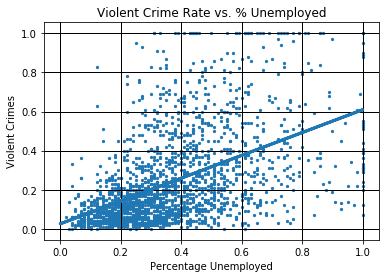

In [15]:
yp = w0 + w1 * x
plt.scatter(x,y,s=5)
plt.ylabel('Violent Crimes')
plt.xlabel('Percentage Unemployed')
plt.title('Violent Crime Rate vs. % Unemployed')
plt.grid(color='black', linestyle='-', linewidth=1)
plt.plot(x, yp, linewidth=3)

In [16]:
# Reshapes train and test arrays from 1D to 2D
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [19]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
acc = regr.score(x_train,y_train)
predict = regr.predict(x_test) 
test_error = np.sum(np.square(y_test - predict)) / (2 * y_test.shape[0])
print(test_error)
print("Accuracy on training data = %f" % acc)

0.018745175835366886
Accuracy on training data = 0.240761


In [20]:
model = linear_model.Ridge(fit_intercept=True)
nalpha = 100
alphas = np.logspace(-3,1,nalpha)

In [21]:
test_errors = []  # To store values of test errors for different alphas.
min_error = float('inf')
for i in range(100):
    model.alpha = alphas[i]
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    test_err = np.sum(np.square(y_test - pred)) / (y_test.shape[0])
    test_errors.append(test_err)
    if(test_err < min_error):
        min_error = test_err
        coeff = model.coef_
        intercept = model.intercept_
    acc = model.score(x_train,y_train)

print(test_errors)
print("Accuracy on training data = %f" % acc)

[0.037490390686794606, 0.03749039449114121, 0.03749039866647416, 0.03749040324897792, 0.0374904082783677, 0.03749041379823428, 0.037490419856422576, 0.03749042650544724, 0.03749043380294894, 0.03749044181219539, 0.03749045060263137, 0.037490460250482825, 0.03749047083942007, 0.03749048246128618, 0.03749049521689688, 0.03749050921691906, 0.037490524582835694, 0.03749054144800578, 0.03749055995882866, 0.037490580276023214, 0.03749060257603336, 0.037490627052572466, 0.03749065391832074, 0.03749068340679074, 0.03749071577437818, 0.037490751302616795, 0.037490790300657675, 0.0374908331079964, 0.03749088009747285, 0.03749093167857215, 0.03749098830105738, 0.03749105045896896, 0.03749111869502844, 0.03749119360548958, 0.037491275845483535, 0.037491366134911046, 0.03749146526493976, 0.03749157410517234, 0.03749169361155808, 0.03749182483512956, 0.03749196893165585, 0.03749212717231444, 0.037492300955497215, 0.03749249181987971, 0.037492701458899554, 0.03749293173680862, 0.037493184706485085, 0

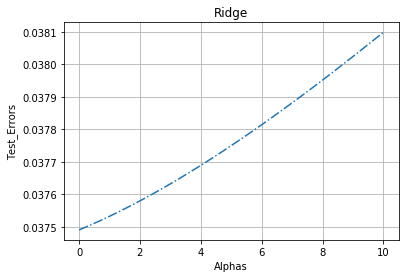

In [22]:
plt.plot(alphas,test_errors,'-.')
plt.xlabel('Alphas')
plt.ylabel('Test_Errors')
plt.title('Ridge')
plt.grid()

In [23]:
model = linear_model.Lasso(warm_start=True, fit_intercept = True)
nalpha = 100
alphas = np.logspace(-3,1,nalpha)

In [24]:
test_errors = []
min_error = float('inf')
for i in range(len(alphas)):
    model.alpha = alphas[i]
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    test_err = np.sum(np.square(y_test - pred)) / (y_test.shape[0])
    test_errors.append(test_err)
    if(test_err < min_error):
        min_error = test_err
        coeff = model.coef_
        intercept = model.intercept_
    acc = model.score(x_train,y_train)
    
print(test_errors)
print("Accuracy on training data = %f" % acc)

[32.86124903245608, 32.80651819692603, 32.74673007474177, 32.68144862319414, 32.61020695011353, 32.532506691448766, 32.4478178159758, 32.35557899854087, 32.255198737430895, 32.14605743315685, 32.027510696720256, 31.89889421722097, 31.759530593767835, 31.60873862786174, 31.445845683099044, 31.270203853253992, 31.081210842440836, 30.878336658041963, 30.661157455544668, 30.4293981629529, 30.18298586139945, 29.922116320474213, 29.647336596675622, 29.359647219447933, 29.060628233382968, 28.752594263731666, 28.43878485719637, 28.1235976593929, 27.81287357058056, 27.514244927928015, 27.237560062798945, 26.995400356138184, 26.803709261416788, 26.682556800111357, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.652872676023147, 26.65287267602314

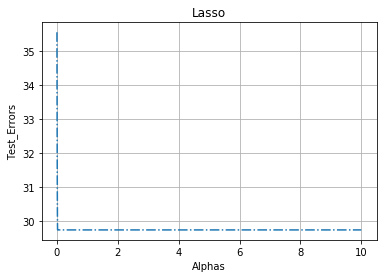

In [21]:
plt.plot(alphas,test_errors,'-.')
plt.xlabel('Alphas')
plt.ylabel('Test_Errors')
plt.title('Lasso')
plt.grid()

In [22]:
#Create new column for classification target variable
df_copy = df.copy()
df_copy['HighCrime']  = np.where (df_copy['ViolentCrimesPerPop']>0.1, 1, 0)

ones, zeroes = df_copy['HighCrime'].value_counts()
n = df_copy.shape[0] # number of rows
df_copy = df_copy.drop(['state','communityname','fold','ViolentCrimesPerPop'],axis=1)

In [23]:
feature_indices = df_copy.columns[:-1]
data= df_copy[feature_indices]
x_scale = sklearn.preprocessing.scale(data)
y = df_copy[df_copy.columns[-1]]
column_headers=list(df_copy)
#print (x_scale.shape,y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(x_scale, y)

In [24]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1494, 100)
(1494,)
(499, 100)
(499,)


In [25]:
#Fitting model
logreg = LogisticRegression(C=100000000)
logreg.fit(X_train, Y_train)

LogisticRegression(C=100000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
yhat = logreg.predict(X_train)
acc = logreg.score(X_train, Y_train)# accuracy on training set
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 0.846051


In [27]:
w = logreg.coef_
intercept = logreg.intercept_

In [28]:
print("Classification Report")
print(sklearn.metrics.classification_report(Y_train, yhat))

prec , recal , fscore,_ = precision_recall_fscore_support(Y_train, yhat)

print ("Precision : ",prec," Recall : ",recal," Fscore : ", fscore)
confusion_matrix(Y_train,yhat)

Classification Report
             precision    recall  f1-score   support

          0       0.79      0.81      0.80       571
          1       0.88      0.87      0.87       923

avg / total       0.85      0.85      0.85      1494

Precision :  [0.79145299 0.88118812]  Recall :  [0.81085814 0.86782232]  Fscore :  [0.80103806 0.87445415]


array([[463, 108],
       [122, 801]])

In [29]:
slopes = {'feature': column_headers[:-1], 'slope': np.squeeze(w[0])}
dataframe_slope = pd.DataFrame(data=slopes)
dataframe_slope

,feature,slope
0,population,4.076956
1,householdsize,-0.830843
2,racepctblack,0.044200
3,racePctWhite,-2.154937
4,racePctAsian,-0.254116
5,racePctHisp,-0.188214
6,agePct12t21,1.175613
7,agePct12t29,-0.622793
8,agePct16t24,-0.399574
9,agePct65up,0.817580


In [30]:
from sklearn.metrics import log_loss
likelihood = log_loss(Y_train, yhat)
print(likelihood)


5.317272374398875


In [31]:
likelihoods = []
max_likelihood=float('-inf')
model = LogisticRegression(C=100000000)
nalpha = 100
alphas = np.logspace(-3,1,nalpha)
for i in range(len(alphas)):
    model.alpha = alphas[i]
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    likelihood = log_loss(Y_test, pred)
    likelihoods.append(likelihood)
    if(likelihood > max_likelihood):
        max_likelihood = likelihood
        coeff = model.coef_
        intercept = model.intercept_

In [32]:
from sklearn.model_selection import KFold
log_model = LogisticRegression(C=100000000)
nfold = 5
kf = KFold(n_splits=nfold)
prec = []
rec = []
f1 = []
acc = []

split = kf.split(X_train)

for train, test in split:
    Xtr = X_train[train,:]
    ytr = Y_train.iloc[train] #iloc important, otherwise getting NaN strings
    Xts = X_train[test,:]
    yts = Y_train.iloc[test]
   
    log_model.fit(Xtr, ytr)
    yhat = log_model.predict(Xts)
    
    
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat == yts)
    acc.append(acci)


precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)



print('Precision = {0:.4f}'.format(precm))
print('Recall =    {0:.4f}'.format(recm))
print('f1 =        {0:.4f}'.format(f1m))
print('Accuracy =  {0:.4f}'.format(accm))

Precision = 0.8448
Recall =    0.8343
f1 =        0.8391
Accuracy =  0.8026


(0, 0.1)

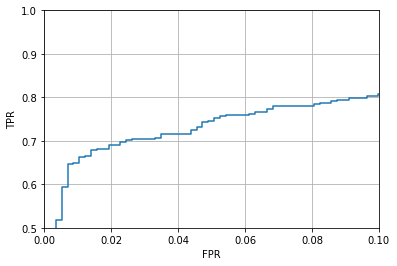

In [33]:
from sklearn import metrics
yprob = logreg.predict_proba(X_train)

fpr, tpr, thresholds = metrics.roc_curve(Y_train,yprob[:,1]) 
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.5,1])
plt.xlim([0,0.1])

Text(0.5,0,'Threshold')

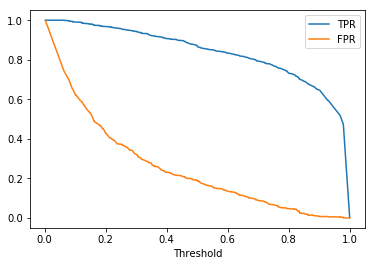

In [34]:
plt.plot(thresholds,tpr, thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')

In [35]:
auc=metrics.roc_auc_score(Y_train,yprob[:,1])
print("AUC=%f" % auc)

AUC=0.938015


Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
The minimum test error rate =   1.7135e-01, SE=  1.0015e-02
The C value corresponding to minimum error =   2.6367e-02


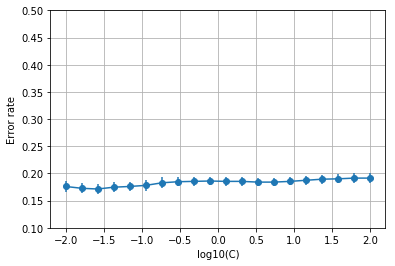

In [48]:
npen = 20
C_test = np.logspace(-2,2,npen)

nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
err_rate = np.zeros((npen,nfold))
num_nonzerocoef = np.zeros((npen,nfold))
lasso_logreg = linear_model.LogisticRegression(penalty='l1',warm_start=True)


for ifold, Ind in enumerate(kf.split(X_train)):        
    
    Itr, Its = Ind
    Xtr = X_train[Itr,:]
    ytr = Y_train.iloc[Itr]
    Xts = X_train[Its,:]
    yts = Y_train.iloc[Its]
    
    
    for ipen, c in enumerate(C_test):
        
                
        logreg.C= c
        logreg.fit(Xtr, ytr)
        yhat = logreg.predict(Xts)
        err_rate[ipen,ifold] = np.mean(yhat != yts)
        num_nonzerocoef[ipen,ifold]=np.sum(abs(logreg.coef_)>0.001)
        
    print("Fold %d" % ifold)
    
err_mean = np.mean(err_rate, axis=1)
num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)
plt.errorbar(np.log10(C_test), err_mean, marker='o',yerr=err_se)
plt.ylim([0.10,0.50])
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

imin = np.argmin(err_mean)

print("The minimum test error rate = %12.4e, SE=%12.4e" % (err_mean[imin], err_se[imin]))
print("The C value corresponding to minimum error = %12.4e" % (C_test[imin]))

In [37]:
err_tgt = err_mean[imin] + err_se[imin]
iopt = np.where(err_mean < err_tgt)[0][0]
C_opt = C_test[iopt]

print("Optimal C=%12.4e" % C_opt)
print("The test error rate = %12.4e, SE=%12.4e" % (err_mean[iopt], err_se[iopt]))

print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(1-err_mean[iopt], err_se[iopt]))

Optimal C=  1.0000e-02
The test error rate =   1.7401e-01, SE=  9.3297e-03
Accuracy =  0.8260, SE=0.0093


The number of non-zero coefficients for the optimal C = 99.100000


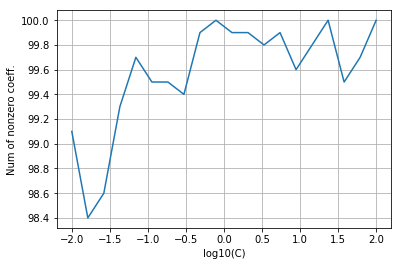

In [38]:
num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
plt.plot(np.log10(C_test),num_nonzerocoef_mean)

plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Num of nonzero coeff.')

print("The number of non-zero coefficients for the optimal C = %f" % num_nonzerocoef_mean[iopt])

Accuracy on the training data is 0.811623


Text(0.5,1,'l1-regularization')

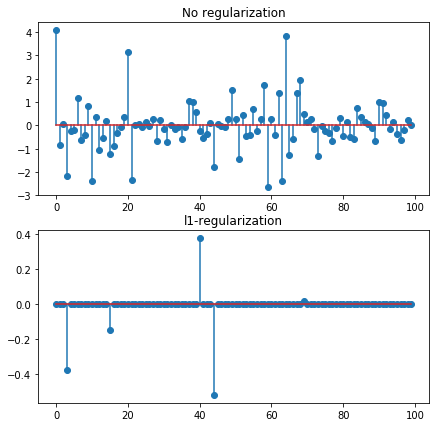

In [39]:
lasso_logreg = linear_model.LogisticRegression(C=C_opt,penalty='l1')
lasso_logreg.C= C_opt
lasso_logreg.fit(X_train,Y_train)
yhat = lasso_logreg.predict(X_test)
acc = np.mean(yhat == Y_test)
print('Accuracy on the training data is {0:f}'.format(acc))
W_l1 = lasso_logreg.coef_

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(w[0,:])#
plt.title('No regularization')
plt.subplot(2,1,2)
plt.stem(W_l1[0,:])
plt.title('l1-regularization')

In [40]:
acc_train_svm=[]
acc_test_svm=[]
c_svm=[]

In [41]:
from sklearn import svm

def svm_linear(c,kernel):
    
    svc = svm.SVC(probability = False, kernel = kernel, C = c)
    svc.fit(X_train, Y_train)
    
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    
    c_svm.append(c)

Accuracy = 0.783133
Accuracy = 0.805611
Accuracy = 0.827979
Accuracy = 0.813627
Accuracy = 0.842704
Accuracy = 0.839679
Accuracy = 0.854083
Accuracy = 0.829659
Accuracy = 0.855422
Accuracy = 0.829659
Accuracy = 0.860107
Accuracy = 0.839679
Accuracy = 0.860107
Accuracy = 0.837675


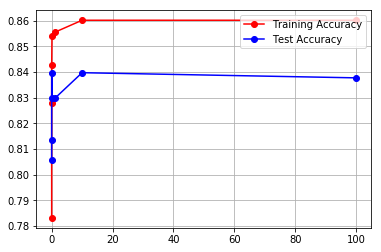

In [42]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for c in c_values:
    svm_linear(c, 'linear')

#Plotting test_accuracy vs c , and training accyracy vs c
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [43]:
acc_train_svm=[]
acc_test_svm=[]
c_svm=[]

Accuracy = 0.617805
Accuracy = 0.655311
Accuracy = 0.617805
Accuracy = 0.655311
Accuracy = 0.621821
Accuracy = 0.655311
Accuracy = 0.819277
Accuracy = 0.807615
Accuracy = 0.872825
Accuracy = 0.821643
Accuracy = 0.973896
Accuracy = 0.823647
Accuracy = 1.000000
Accuracy = 0.799599


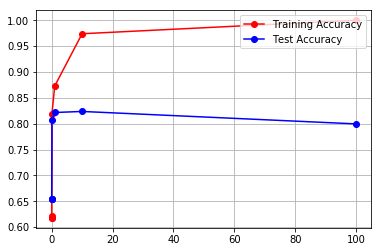

In [44]:
for c in c_values:
    svm_linear(c, 'rbf')
    
    
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [45]:
poly_acc_train_svm=[]
poly_acc_test_svm=[]
poly_c_svm=[]

In [46]:
def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    A = X_train[0:1000,:] 
    B = Y_train[0:1000]  
    C = X_test[0:400,:]   
    D = Y_test[0:400]
    
    svc_polynomial.fit(A, B)
    
    
    Yhat_svc_polynomial_train = svc_polynomial.predict(A)
    acc_train = np.mean(Yhat_svc_polynomial_train == B)
    poly_acc_train_svm.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_polynomial_test = svc_polynomial.predict(C)
    acc_test = np.mean(Yhat_svc_polynomial_test == D)
    poly_acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    
    poly_c_svm.append(c)

Accuracy = 0.616000
Accuracy = 0.657500
Accuracy = 0.616000
Accuracy = 0.657500
Accuracy = 0.629000
Accuracy = 0.680000
Accuracy = 0.727000
Accuracy = 0.717500
Accuracy = 0.857000
Accuracy = 0.797500
Accuracy = 0.955000
Accuracy = 0.792500
Accuracy = 1.000000
Accuracy = 0.785000


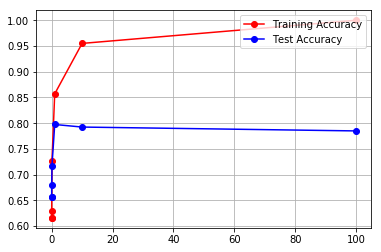

In [47]:
for c in c_values:
    svm_polynomial(c)
    
    
plt.plot(poly_c_svm, poly_acc_train_svm, 'ro-') 
plt.plot(poly_c_svm, poly_acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')